# Assignment 2

## Author: Christopher Budd

**Original Dataset Source: Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.**

## Task 0
Import Libraries

In [148]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Task 1
Import the adult dataset from the ucimlrepo

In [149]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

## Task 2
Take a quick look at the data structure (i.e., X) using .head(), .info(),.describe(), and .shape.

In [150]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [152]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [153]:
X.shape

(48842, 14)

## Task 2.1
Plot a histogram of the data.

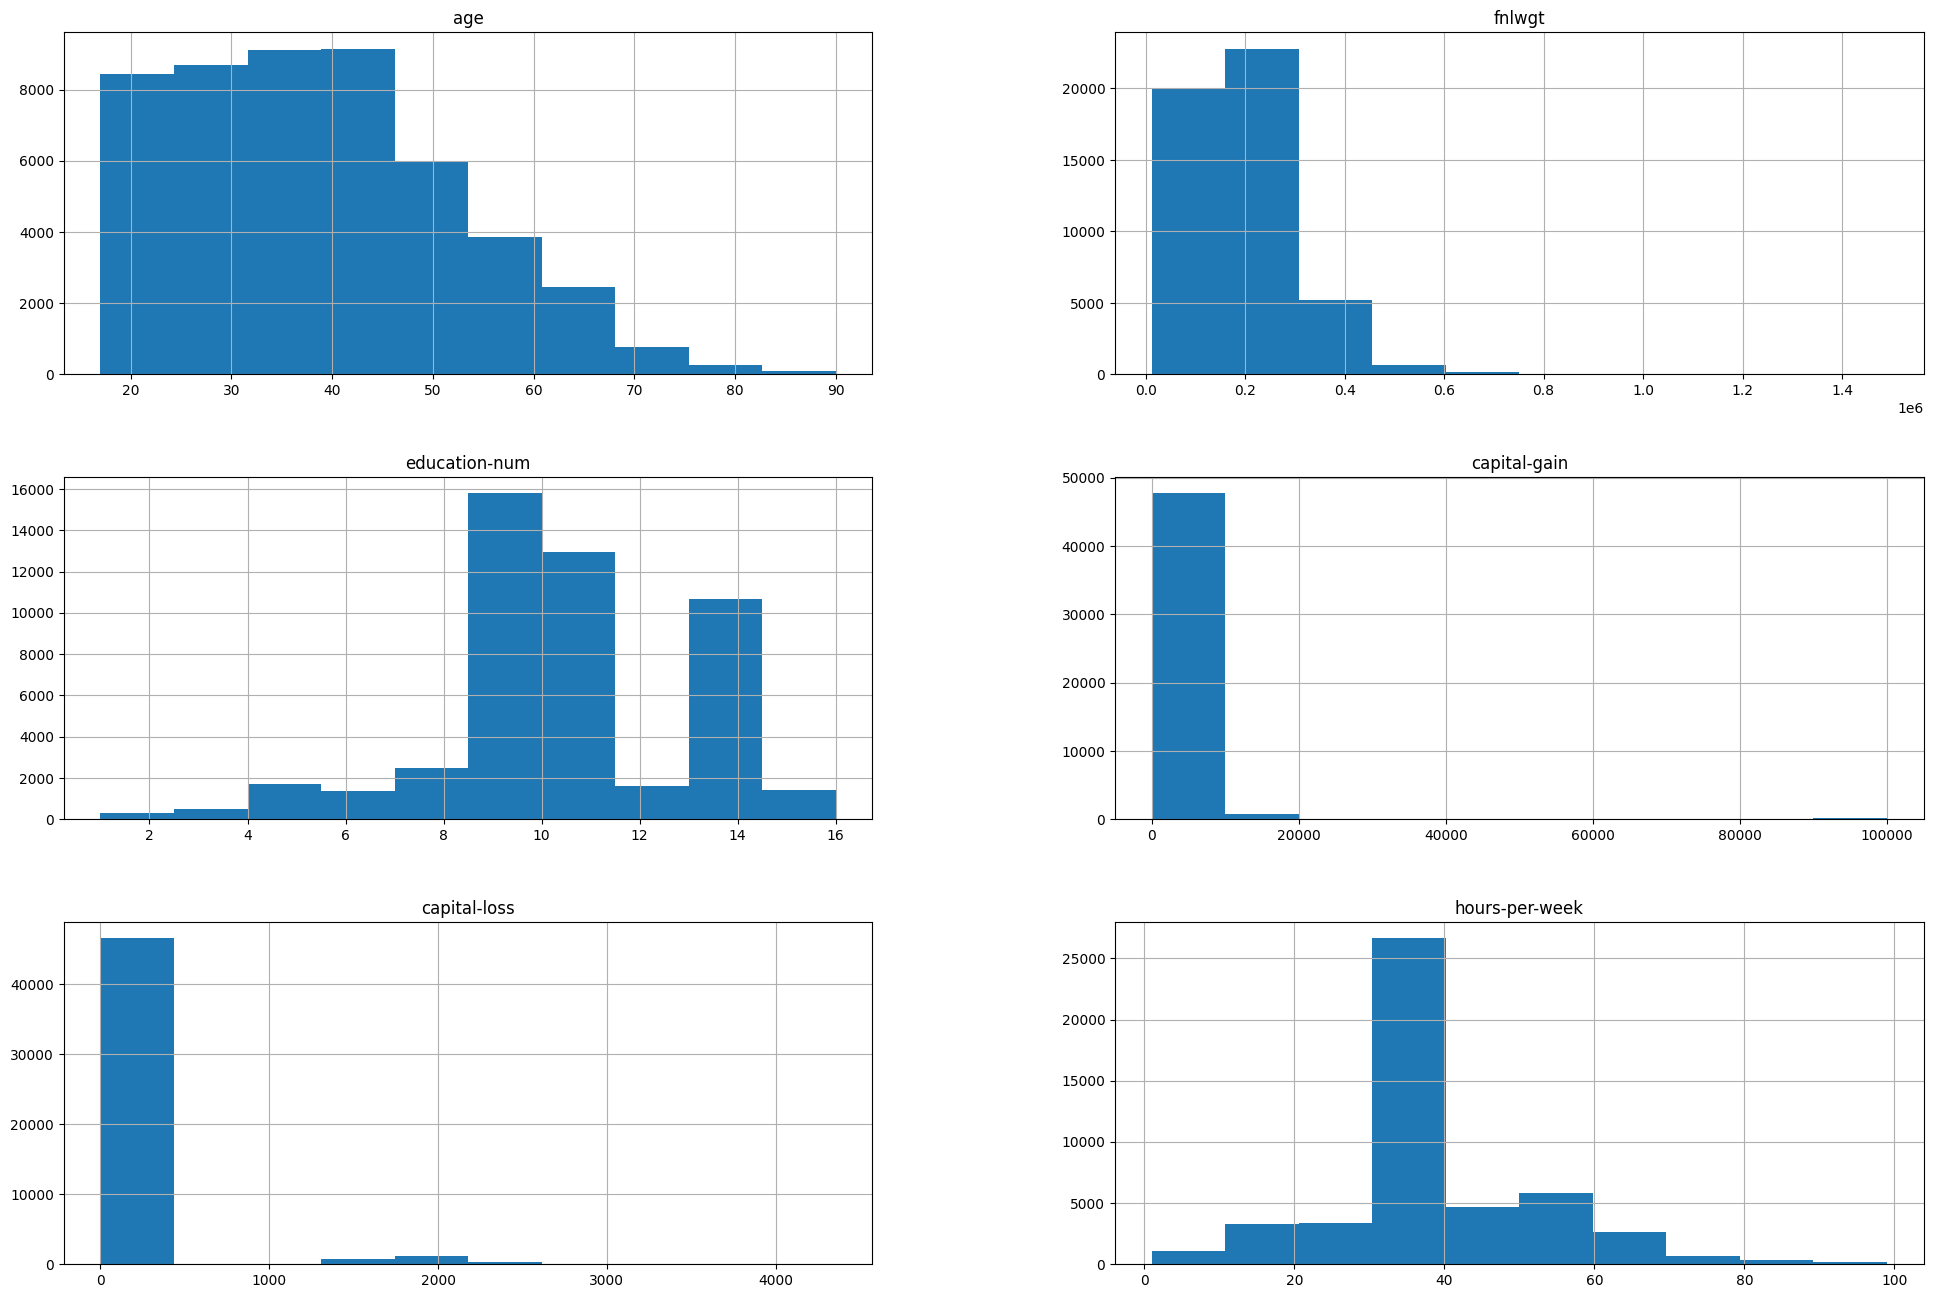

In [154]:
X.hist(figsize=(24, 16))
plt.show()

## Task 3
There are missing values in this dataset that are entered as ?, check for the number of these missing values. 

In [155]:
# Find the number of empty/missing values
(X == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

## Task 4
Replace the missing values you found in the previous step with null (nan).
Run a X.info() to see the non-null count.

In [156]:
# Replace the ? values
X= X.replace('?', np.nan)
X.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


## Task 5
Check for duplicate rows, and remove them.

In [158]:
X.duplicated().sum()

57

In [159]:
X.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


## Task 6
Create and apply a preprocessing pipeline to:
1. Fill in the missing numerical values with the mean using a SimpleImputer.
2. Scale the numerical columns using StandardScaler. Do not scale the target.
3. Fill in the missing categorical values with the most_frequent value using
SimpleImputer.
4. Encode the categorical columns using OneHotEncoder. Do not encode the target.
- Display your pipeline.
- Print X_prepared.shape.

In [160]:
# Import for creation of the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [161]:
# Splitting up the data into numerical data types and none numrical data types
num_data_cols = X.select_dtypes(include='number').columns.to_list()
none_num_data_cols = X.select_dtypes(exclude='number').columns.to_list()

# Create pipes for both numeric and nono numeric data
num_pipe = make_pipeline(SimpleImputer(strategy="mean"),StandardScaler())
none_num_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())
# Use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipe, num_data_cols),
                                    ("cat", none_num_pipe,  none_num_data_cols)],
                                    remainder='passthrough')

In [162]:
num_data_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [163]:
none_num_data_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [164]:
# View pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [165]:
#Use pipeline on dataset
X_prepared = preprocessing.fit_transform(X)

print(X_prepared.shape)

(48842, 105)


## Task 7
Check the target value_counts. You will notice that the target needs some data cleaning.

In [166]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

## Task 7.1
Remove the period at the end of the >50K. and <=50K. i.e., replace all instances that are <=50K. with <=50K , and replace all the instances that are >50K. with >50K

In [167]:
y = y.replace(">50K.", ">50K")
y = y.replace("<=50K.", "<=50K")

y.value_counts()

income
<=50K     37155
>50K      11687
Name: count, dtype: int64

## Task 8
Split the data into 80% training set and 20% testing set, print the shape of X_train, X_test, y_train, y_test in one command.

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073, 1) (9769, 105) (9769, 1)


## Task 9
Train a svm model (svc) to predict if the income of the adult exceeds 50K on the training set using: kernel = poly, gamma = 1, and C =0.1. Call your model
model_svm.

In [169]:
from sklearn.svm import SVC
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train[:10000], y_train[:10000].values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

## Task 9.1
Test your model on the X_Test, and report the classification_report on the
y_test and y_predict.

In [170]:
# Test the model
from sklearn.metrics import classification_report

y_predict = model_svm.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7414
        >50K       0.63      0.58      0.60      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



## Task 9.2
Display the confusion matrix of your test results using
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

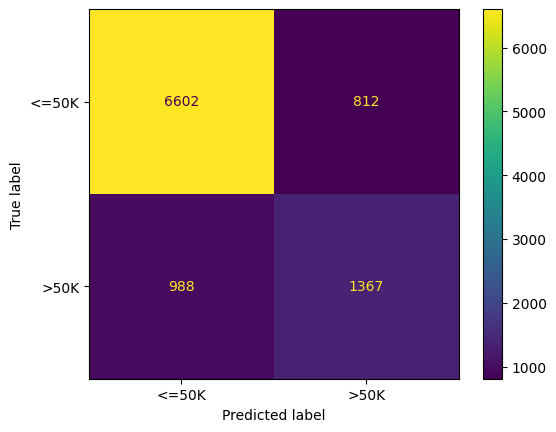

In [171]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

## Task 10
 Use GridSearchCV to find the best value of kernel, gamma, and C

## Task 10.1
Split the dataset into 60% training, 20% validation, and 20% testing. Use the code
below to perform the split

In [172]:
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


## Task 10.2
Use the below code snippet to pass the following hyperparameters for the
GridSearchCV to find the best ones.

In [173]:
from sklearn.model_selection import GridSearchCV

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1, 10],
                  'gamma': [0.01, 1, 10]
                 }

svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters
                     )
svm_gs.fit(X_train[:10000], y_train[:10000].values.ravel())

svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

0.8472563472563472

## Task 10.3
Check the svm winner parameters using svm_winner

In [174]:
svm_winner

SVC(C=10, gamma=0.01)